# 01. 합성곱 신경망 (CNN)
> 이미지 분석 등에 주로 사용되는 합성곱 신경망(CNN)에 대해 알아봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 8]
- permalink: /cnn
- exec: colab

### 1. Fundamental of CNN (Convolutional Neural Network)

이미지와 같은 데이터들은 2D 이상의 차원을 가집니다. 그러나 우리가 지금까지 배운 다층퍼셉트론(MLP)등의 모델은 이미지와 같은 2차원 데이터를 있는 그대로 처리하지 못합니다. 무슨말인지 알아볼까요? <br><br>

![](https://wikidocs.net/images/page/64066/conv1.png)

![](https://testerstories.com/files/ai_and_ml/ml-mnist-2d-to-1d.png)
<br>

우리가 기존에 사용하던 다층 퍼셉트론(MLP) 신경망은 데이터 샘플 하나를 벡터로서 입력받습니다. 우리가 붓꽃 예제를 풀때를 생각해봅시다. 하나의 데이터를 [꽃잎길이, 꽃잎너비, 꽃받침길이, 꽃받침너비]와 같이 Rank가 1인 벡터로 입력받아왔습니다. 이렇게 다층 퍼셉트론은 Rank가 1차원인 데이터를 입력받아야하기 때문에 이미지와 같은 높은 차원의 데이터를 1차원으로 평면화 시켜야합니다. 그러나 이렇게 평면화 시켜서 입력하면 이미지의 공간적인 특징이 사라지게 됩니다. 이 문제를 어떻게 해결했을까요? <br><br>

#### 1.1. 고양이의 눈에서 답을 얻다
![](https://i0.wp.com/k.kakaocdn.net/dn/nni6z/btqBD2aVqYg/uYXKGG1VB7LjZpua8OTOwK/img.png?w=750&ssl=1)

1950년대 허블(Hubel)과 비셀(Wiesel)은 고양이의 시각 피질 실험에서 고양이 시야의 한 쪽에 자극을 주었더니 전체 뉴런이 아닌 특정 뉴런만이 활성화되는 것을 발견했습니다. 즉, 눈이 어느 지점을 바라볼 때 뇌의 모든부분이 활성화 되는 것이 아니라 특정 부분만 활성화된다는 것이였습니다. 
<br><br>

이러한 아이디어에 영향을 받은 얀 르쿤(Yann Lecan) 교수는 기존처럼 모든 노드들이 전부 연결 되어있는 기존의 인공신경망이 아닌 눈이 바라보고 있는 곳에 따라서 특정 노드들만 연결되는 획기적인 인공신경망을 고안해 냈습니다. 이전 시간에 배운 RNN이 인간의 '기억' 메커니즘을 컴퓨터로 모델링했다면, CNN은 동물의 '눈'을 컴퓨터로 모델링한 신경망 구조입니다. <br><br>

#### 1.2. 이미지에 대해서 (채널이란?)

![](https://cdn-images-1.medium.com/freeze/max/1000/0*4V0cYpmKNE5SPdVz.jpg?q=20)

이미지는 거대한 행렬로 이해하시면 됩니다. 위 처럼 우리는 이미지의 형상이 보이지만, 컴퓨터에게 이미지는 픽셀의 수치가 적힌 거대한 행렬입니다. 그러면 이 이미지 데이터는 2차원일까요? 우리는 보통 이미지를 2차원 데이터라고 부르지만, 사실은 이는 정확한 말이 아닙니다. 흑백이미지의 경우는 2차원이 맞지만, 컬러 이미지는 3차원의 차원을 가집니다. 이게 무슨뜻일까요?

![](https://i0.wp.com/k.kakaocdn.net/dn/bbIGmT/btqBGftlKCn/yx8KQzY8N6tu8OZSyIrlTK/img.png?w=750&ssl=1)

컬러 이미지의 경우 가로, 세로말고 '채널'이라는 개념을 가지고 있습니다. 이 채널은 색상을 의미하는데 일반적으로 우리는 컬러 이미지가 R, G, B의 세개의 채널을 가지고 있다고 이야기합니다. 기존에 등장했던 신경망인 다층 퍼셉트론 신경망의 경우 3차원의 이미지 데이터를 학습시키기 위해 1차원으로 평면화 시키는데 이 과정에서 이미지의 공간 정보가 유실이 되게 됩니다. <br><br>

이미지의 공간 정보란 말 그대로 이미지가 가지는 ‘공간적인 정보’를 말합니다. 이미지를 이루는 가장 작은 단위를 픽셀(pixel)이라고 하는데 거리가 가까운 픽셀들은 서로 연관을 띠게 됩니다. 이는 곧 사진에서 음영, 선, 질감 등으로 보여지는 것이며 다시 말하면 이런 픽셀들의 연관성이 이미지가 가지는 공간정보라고 할 수 있습니다. CNN은 다층 퍼셉트론과 다르게 입력 데이터의 원래 구조를 유지해서 입력 받고 다음 단계로 전달할때에도 이 구조를 유지합니다. 이렇게 입력 데이터의 공간정보를 잃지 않으므로 이미지 데이터를 잘 이해할 수 있는 것입니다. <br><br>


#### 1.3. 필터 (Filter = Kernel)

이제 CNN의 첫번째 단계인 필터링 과정을 볼까요?. 필터링은 입력 받은 이미지를 잘 분류하기 위해 이미지에 필터를 씌워 특징을 찾는 작업입니다. 필터링은 이미지 처리 분야에서 광범위하게 이용되고 있는 기법으로써, 이미지에서 테두리 부분을 추출하거나 이미지를 흐릿하게 만드는 등의 기능을 수행하기 위해 이용됩니다. 필터링은 행렬의 형태로 표현된 이미지에 대해 행렬로 표현된 필터를 동일하게 적용함으로써 수행됩니다.  

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F99EC29495C5D8ACF1CCF36)

이미지에 위와 같은 필터(행렬)을 **합성곱**하면 출력으로 오른쪽과 같은 이미지들이 출력됩니다. 사진편집 앱에서 이미지를 흐리게 하거나 날카롭게 하는 등의 기능을 보신적이 있으실겁니다. 그러한 기능들은 모두 위와 같은 필터를 이용해 수행하는 것입니다. 이러한 필터는 다른 이름으로 커널이라고도 부르며, 뒤에서 자세히 말하겠지만 사실 CNN은 이 필터를 가중치(W값)로 놓고 학습하게 됩니다. 그렇다면 이미지에 필터를 적용하는 방법인 합성곱 연산은 어떤 연산일까요?<br><br>

#### 1.4. 합성곱 (Convolution)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F9989933E5BC97E652B564A) 

Convolution의 사전적 정의는 합성곱입니다. 단순히 이렇게만들으면 의미를 잘 이해하지 못할수 있는데 알고보면 이 알고리즘을 가장 잘 표현한 용어같습니다. 사실 Convolution은 처음 등장한 개념이 아니라 CNN이 등장하기 한참 전부터 이미지처리에서 사용되었던 개념입니다.

![](https://user-images.githubusercontent.com/15958325/58780750-defb7480-8614-11e9-943c-4d44a9d1efc4.gif)

위 애니메이션 첫번째 단계를 그림으로 보면 다음과 같습니다.

![](https://user-images.githubusercontent.com/15958325/58845860-ca23ed00-86b7-11e9-805f-ef5c8adcab9f.png)

빨간 박스는 필터가 적용될 영역이고 이름은 Patch(패치)라고 합니다. 이 패치의 값들과 필터의 값들을 **원소곱**하고, 그 결과가 출력 이미지가 됩니다. 또한 필터를 움직이는 크기는 개발자의 임의로 위 이미지처럼 한칸씩 이동시키면서 적용시킬건지, 두칸씩 이동할건지 정할 수 있습니다. 이 값을 stride라고 합니다. 추가로 기억해야할 것은 합성곱 연산을 수행하고나면 이미지의 크기가 작아집니다. 가령 위처럼 5x5 이미지에 3x3의 필터를 합성곱하면 5 - 3 + 1 = 3이 됩니다. 즉, input - kernel + 1의 사이즈로 최종 출력이 계산됩니다. 
<br><br>

#### 1.5. 패딩 (Padding)

우리는 이미 자연어 처리에서 패딩이 의미하는 바가 무엇인지 배웠습니다. 패딩이란 값을 0과 같은 임의의 값으로 채워서 텐서의 사이즈를 유지하거나 키우는 기법입니다. 이미지처리에서도 패딩을 활용하는데 아래와 같습니다. 

![](https://user-images.githubusercontent.com/15958325/58846398-ff313f00-86b9-11e9-8268-7989df7d38f2.png)

이미지 처리에 있어서 패딩이란 위 처럼 이미지를 가운데에 두고 0으로 테두리를 채우는 작업을 의미합니다. 이로서 이미지의 가로(width)는 2만큼 길어지고, 세로(height)도 2만큼 길어지게 됩니다. 
<br><br>

#### 1.6. 풀링 (Pooling)

풀링은 패딩과는 다르게 이미지의 크기를 줄이는 방법입니다. 우리가 이미지의 크기를 그대로 유지한채로 계속 연산한다면 연산량이 너무 클 것입니다. 

![](https://i2.wp.com/k.kakaocdn.net/dn/sDDZJ/btqBFvDsyJf/j4kwwQwLRpSDnfWM32Gd61/img.png?w=750&ssl=1)

풀링은 다양한 방법으로 수행할 수 있는데, Max Pooling은 단위 영역에서 최대값으로 구성한 새로운 이미지, Average Pooling은 단위 영역의 값들의 평균으로 구성한 새로운 이미지, Min Pooling은 단위 영역 값들에서 최소값으로 구성한 새로운 이미지입니다. 이 단위영역의 크기는 개발자가 설정할 수 있습니다. (위처럼 2x2 영역, 혹은 3x3 등)  일반적으로 MaxPooling이 가장 잘 작동한다고 알려져있으며, Min Pooling은 가장 덜 중요한 값들만 추출한 것이니, 사용하시면 안됩니다.
<br><br>

#### 1.7. 이미지 사이즈 

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbgnKVA%2FbtqxTK6I4u3%2FwJrmZv2JzCxLRg5BjgWON0%2Fimg.jpg)

이미지 사이즈는 위 처럼 계산됩니다.

- 입력 이미지 높이 : H
- 입력 이미지 너비 : W
- 필터 높이 : FH
- 필터 너비 : FW
- Stride 크기 : S
- 패딩 사이즈 : P
<br><br>

이렇게 계산되는 이유에 대해 알아봅시다. 우선 입력높이(H)와 입력너비(W)눈 그대로 있는 상태에서 패딩(P)이 추가되면 2P가 추가됩니다. 패딩(P)은 한쪽만 추가되는 것이 아니라 양쪽에 추가되기 때문입니다. 여기에서 필터의 사이즈(FH, FW) - 1 만큼 감소됩니다. 수식에서는 -(-FW + 1(분수 바깥쪽)) 같이 표기하였습니다. 왜 이렇게 되는지 합성곱 연산을 다시 봅시다. <br><br>

![](https://user-images.githubusercontent.com/15958325/58780750-defb7480-8614-11e9-943c-4d44a9d1efc4.gif)

위를 보면 5x5 이미지에 3x3 필터를 덧대면, 5칸 중에서 3칸을 움직이기 때문에 출력 이미지는 3x3이 되었습니다 이는 5 - 3 + 1 = 3이 됩니다. 

![](https://cdn-images-1.medium.com/max/1200/1*1okwhewf5KCtIPaFib4XaA.gif)

만약 위 처럼 7x7이미지에 3x3 필터를 합성곱하면 7 - 3 + 1로 5x5의 이미지가 됩니다. 이해가 가시나요? 그리고 마지막으로 움직이는 간격인 stride로 나눠줍니다. 자 이제 합성곱 신경망을 이해하기 위한 모든 것이 준비되었습니다. 이제 시작해볼까요?

<br>

### 2. 합성곱 신경망 (Convolutional Neural Network)

![](https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

보통 CNN은 위와 같이 표현합니다. 각 단계를 하나하나 알아보겠습니다.
<br><br>

- 가장 먼저 28 x 28 x 1의 흑백 입력이미지에 5x5의 필터를 합성곱합니다. 패딩은 0, 스트라이드는 1, 필터사이즈는 5이기 때문에 이미지 사이즈는 28-5+1=24가 됩니다. 이때 하나의 필터를 합성곱하면 하나의 출력 이미지가 나오므로 여러장의 필터(5x5xn1)를 만들어서 여러장의 이미지(n1장, 24x24xn1)로 만들어줍니다. 

- 합성곱 이후에 이미지의 크기가 너무 크므로 풀링을 수행해서 이미지의 크기를 절반으로 줄여줍니다. (12x12xn1)

- 다시 합성곱을 수행합니다. 12x12xn1장의 이미지들에 5x5필터를 합성곱합니다. 패딩은 0, 스트라이드는 1, 필터사이즈는 5이기 때문에 이미지의 사이즈는 12-5+1=8이 됩니다. 이 때, 마찬가지로 n2/n1 장의 필터를 사용해서 이미지 사이즈를 8x8xn2로 만들어줍니다.

- 합성곱 이후에 이미지의 크기가 여전히 너무 크므로 풀링을 수행해서 이미지의 크기를 절반으로 줄입니다. (4x4xn2)

- 4x4xn2의 텐서를 reshape(1, 16n2)하면 길쭉한 벡터(1 x 16n2)가 됩니다. 이 과정을 flatten 과정이라고 합니다. (텐서를 벡터로 쭉 펴는 것)

- 이 flatten 벡터를 다층퍼셉트론(MLP)의 은닉층에 입력합니다. 다층퍼셉트론(MLP)의 은닉층 가중치는 (16n2, n3)으로 초기화 합니다. 그러면 (1, 16n2) @ (16n2, n3)이 수행되고 (1, n3)의 벡터가 출력됩니다. 

- n3사이즈의 벡터를 다층퍼셉트론(MLP)의 출력층에 입력합니다. 다층퍼셉트론(MLP)의 출력층 가중치는 (n3, 10)으로 초기화합니다. 그러면 (1, n3) @ (n3, 10)이 수행되고, (1, 10)의 벡터가 출력됩니다.

- 여기에 softmax 활성화함수를 도입하면 0부터 9까지의 숫자에 대한 확률 값이 되고, 정답 원핫벡터 [0, 0, 1, 0, ..., 0]와 확률벡터 [0.01, 0.05, 0.9, 0.01, ..., 0.02]의 차이의 제곱을 최소화시킵니다.
<br><br>

이 때, 사용되는 필터도 역시 가중치이며, 랜덤하게 초기화 됩니다. 그리고 학습을 진행하면서 필터의 값들도 역전파 알고리즘에 의해 학습됩니다. 즉, 합성곱층, 풀링층 모두 역전파 알고리즘에 의해 기울기가 계산되며 합성곱층의 필터는 학습되어 계속적으로 변화합니다. <br><br>

합성곱 신경망의 역전파 알고리즘은 조금은 까다로운 편이라 강의중에는 생략하도록 하겠습니다. 만약 궁금하시다면 (https://metamath1.github.io/cnn/index.html) 여기를 참고하시거나 저한테 질문하면 알려드리겠습니다. 저도 위의 사이트를 보고 공부했는데 제가 본 것 중에서 가장 이해하기 좋았던 것 같습니다.

<br>

### 3. 손글씨 이미지 인식하기

Tensorflow로 CNN을 구현하고 0부터 9까지 숫자에 대한 손글씨 이미지를 인식하는 신경망을 구현해봅시다.

In [1]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

import numpy as np

In [2]:
class CNN(Model):
    
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')
        self.pool1 = MaxPooling2D(pool_size=2)
        self.conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.pool2 = MaxPooling2D(pool_size=2)
        self.flatten = Flatten()
        self.hidden = Dense(256, activation='relu')
        self.out = Dense(10, activation='softmax')
        
        
    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.out(x)
        return x

In [3]:
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()
train_feature = train_feature.astype(np.float32)
test_feature = test_feature.astype(np.float32)

print(train_feature.shape, train_label.shape)
print(test_feature.shape, test_label.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [37]:
def draw_digit(num):
    for i in num:
        for j in i:
            if j == 0:
                print('0', end='')
            else :
                print('1', end='')
        print()

In [38]:
draw_digit(train_feature[0])

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000001111111111110000
0000000011111111111111110000
0000000111111111111111100000
0000000111111111110000000000
0000000011111110110000000000
0000000001111100000000000000
0000000000011110000000000000
0000000000011110000000000000
0000000000001111110000000000
0000000000000111111000000000
0000000000000011111100000000
0000000000000001111100000000
0000000000000000011110000000
0000000000000011111110000000
0000000000001111111100000000
0000000000111111111000000000
0000000011111111110000000000
0000001111111111000000000000
0000111111111100000000000000
0000111111110000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [39]:
draw_digit(train_feature[1])

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000001111100000000
0000000000000011111100000000
0000000000000111111111000000
0000000000011111111111000000
0000000000011111111111000000
0000000000111111111111000000
0000000001111111110011100000
0000000011111100000011100000
0000000111111100000011100000
0000000111100000000011100000
0000000111000000000011100000
0000001111000000000011100000
0000001111000000001111100000
0000001110000000011111000000
0000001110000000111100000000
0000001110000001111000000000
0000001111111111111000000000
0000001111111111100000000000
0000001111111110000000000000
0000000111111100000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [40]:
draw_digit(train_feature[2])

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000011100000
0000110000000000000011100000
0000110000000000000111100000
0000110000000000000111000000
0000110000000000000111000000
0001110000000000000111000000
0001110000000000001111000000
0001110000000000001111000000
0001110000000001111110000000
0001110001111111111110000000
0001111111111111111100000000
0000111111110000011100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


CNN 학습을 위해서는 입력데이터의 랭크가 4여야합니다. 원래 컬러이미지는 (batch_size, width, height, channel)인데, mnist의 경우 흑백 이미지이기 때문에 channel부분의 차원이 제거되어있습니다. 이부분에 차원을 추가해줍니다.

In [8]:
train_feature = np.expand_dims(train_feature, axis=3)
test_feature = np.expand_dims(test_feature, axis=3)

channel 차원이 추가되었습니다.

In [9]:
print(train_feature.shape, train_label.shape)
print(test_feature.shape, test_label.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


현재는 픽셀에 표현된 숫자가 정수형(0 ~ 255)입니다.<br>
한 픽셀의 값을 0 ~ 1이 되게 255로 나눠줍니다.

In [10]:
train_feature /= 255.0
test_feature /= 255.0

In [19]:
cnn = CNN()
cnn.build((None, *train_feature.shape[1:]))
cnn.summary()

Model: "cnn_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           multiple                  320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_15 (Conv2D)           multiple                  18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_7 (Flatten)          multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  409856    
_________________________________________________________________
dense_15 (Dense)             multiple                  2570  

In [21]:
cnn.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cnn.fit(train_feature, train_label, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1175 - accuracy: 0.9637
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0190 - accuracy: 0.9940
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0149 - accuracy: 0.9954


In [23]:
cnn.evaluate(test_feature, test_label)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0260 - accuracy: 0.9914


0.9914000034332275

In [42]:
from matplotlib import pyplot as plt
import random


def draw_prediction(pred, k):
    samples = random.choices(population=pred, k=16)

    count = 0
    nrows = ncols = 4
    plt.figure(figsize=(12,8))

    for n in samples:
        count += 1
        plt.subplot(nrows, ncols, count)
        plt.imshow(test_feature[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
        tmp = "Label:" + str(test_label[n]) + ", Prediction:" + str(predicted_labels[n])
        plt.title(tmp)

    plt.tight_layout()
    plt.show()

- 정답 예제 보기

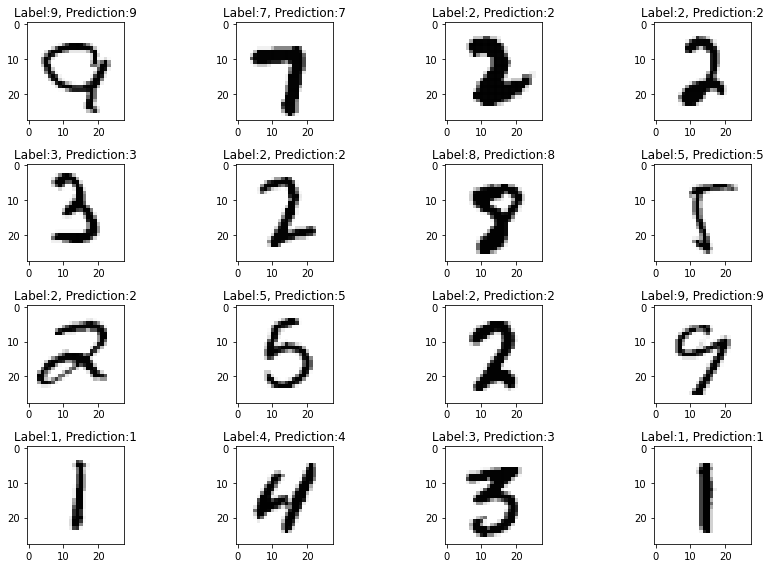

In [44]:
answer_list = []

for n in range(0, len(test_label)):
    if predicted_labels[n] == test_label[n]:
        answer_list.append(n)

draw_prediction(answer_list, 16)

- 오답 예제 보기

사람이 봐도 틀릴만한 이미지들을 많이 틀렸습니다.

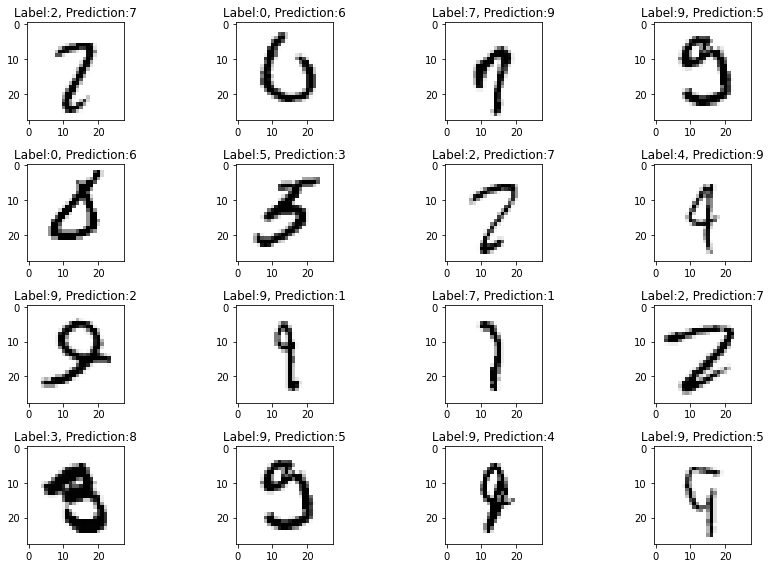

In [45]:
answer_list = []

for n in range(0, len(test_label)):
    if predicted_labels[n] != test_label[n]:
        answer_list.append(n)

draw_prediction(answer_list, 16)